In [1]:
# Python standard library imports
import copy
from itertools import count
import math
import random
import sys

# 3rd party imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def colorful_vertex_plot(G, pos, attr, node_size = 75, cmap = plt.cm.jet, plot_title = ''):
    """ 
    A function that plots nx_graphs colored by attribute
    
    Args:
        G (nx object) ==> a graph
        pos (dict) ==> items map node to (x,y) where node is a node in the graph and (x,y) is the coordinate where that node will be plotted
        attr (string) ==> the node attribute to color by, will almost always be "district"
        node_size (int) ==> the size of the nodes in the plot
        cmap (pyplot object) ==> the color map/color ramp to be used to color the nodes. probably no need to change
        plot_title (string) ==> the title, if you want one
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.set_title(plot_title)
    ax.axis('Off')
    groups = set(nx.get_node_attributes(G, attr).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.node[n][attr]] for n in nodes]
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size = node_size, cmap = cmap)
    


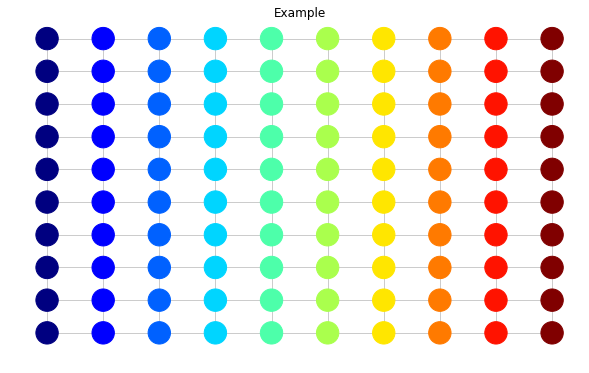

In [14]:
"""

This is an example showing how to use colorful_vertex_plot

"""

G = nx.grid_graph([10,10]) #a 10x10 grid graph

for node in G.nodes():
    first_coord = node[0] #This reads the first coordinate of each node
    G.node[node]['district'] = first_coord #this gives each node a district attribute---district = node[0]
    
pos = {node:node for node in G.nodes} #This is a silly piece of code. colorful_vertex_plot takes an argument
#pos, which is a dictionary teliing the functino where to plot each node. I've set pos to be a dictionary 
#where the key value pairs are node:node for node in G.nodes. This works because when nx makes a grid graph, the
#name of the node IS the position of the node. (This code should work whenever you use a grid graph.)

colorful_vertex_plot(G, pos = pos, attr = 'district', node_size = 500, cmap = plt.cm.jet, plot_title = 'Example')

In [1]:
def identify_boundary_nodes(G):
    """ 
    Should return a list of tuples (p, D) 
    where the p is a precinct and D is a district 
    which does not contain p but is adjacent to it
    
    Note: This will only be used once to get the boundary nodes
    on the initial districting plan
    
    Args:
        G (nx object) ==> a networkx object/graph
        
    Returns:
        List of tuples (p, D)
    """
    
    # TODO: write your code here

In [ ]:
def is_valid_swap(G, pD_tuple, pop_param):
    """ 
    Reassigns precinct p to district D and 
    returns True if resulting plan has all districts contiguous and satifies the population deviation requirement
    returns False otherwise
    
    Args:
        G (nx object) ==> same as above in identify_boundary_nodes
        pD_tuple (tuple) ==> random tuple selected from the list returned by identify_boundary_nodes
        pop_param (decimal) ==> decimal that indicates the allowable population deviation between districts
    
    Returns: True or False
        
    """
    p = pD_tuple[0]
    D = pD_tuple[1]
    
    # TODO: write your code here


In [ ]:
def update_swaps(G, pD_tuple):
    """ 
    Updates the list of (p, D) tuples for graph G where p has been reassigned to district D
    
    Note: This doesn't require iterating through all nodes.
    
    Args:
        G (nx object)
        pD_tuple (tuple)
        
    Returns:
        List of (p, D) tuples
    """
    p = pD_tuple[0]
    D = pD_tuple[1]

In [ ]:
def chain_run(N, G):
    """
    The main while loop.
    
    Args:
        N (int) ==> number of steps to do in the chain
        G (networkx object) ==> initial districting plan
    """
    swaps = identify_boundary_nodes(G)
    t=0
    while t < N:
        t+=1
        # TODO: compute our statistics on G here, and record the results in some data structure we can use to make
        #       to make histograms
        
        pD_tuple = random.choice(swaps)
        p = pD_tuple[0]
        D = pD_tuple[1]
        proposal_G = copy.deepcopy(G)
        # The above makes a temporary copy of G, which we'll call proposal_G
        swap_is_valid = is_valid_swap(proposal_G, pD_tuple, pop_params)
        if  swap_is_valid == False:
            continue
            #If making the swap results in an invalid districting plan, we continue to the next iteration of the loop
        else:
            proposal_swaps = update_swaps(G, pD_tuple)
            
        # TODO: Set p =  MIN( (length of old / len of new list), 1)
        # TODO: use np.binom to flip a coin with probability p of heads
        
        if result == heads:
            G = proposal_G
            swaps = proposal_swaps